# 🍂 Generaring Fake Leaf Image Using GAN ( Generative Adversarial Networks )

In this project we are going to implement Generative Adversarial Networks to Generate Fake Leaf Images using FastAI! And Weights & Biases for saving Experiments

# Images

The images we are using is from [Kaggle Competition Plant Pathology 2020 - FGVC7](https://www.kaggle.com/c/plant-pathology-2020-fgvc7). It contains over 3642 Images, both Training & Testing

# Setting up Workspace

## Downloading Libraries

In [ ]:
!pip install --upgrade fastai
!pip install wandb

     |████████████████████████████████| 194kB 9.6MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 1.7MB 12.9MB/s 
     |████████████████████████████████| 102kB 14.4MB/s 
     |████████████████████████████████| 122kB 52.5MB/s 
     |████████████████████████████████| 163kB 55.9MB/s 
     |████████████████████████████████| 102kB 14.8MB/s 
     |████████████████████████████████| 71kB 10.2MB/s 
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73873 sha256=567feafa874f0b47a4c63db71ff32a208a4c2dcd3c5e5da926d23e0120ee6874
  Stored in directory: /root/.cache/pip/wheels/a8/1d/38/2c19bb311f67cc7b4d07a2ec5ea36ab1a0a0ea50db994a5bc7
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=08acc7bebb25158bd2b2ff65d1529e9e518bf69745404e6dc107b7e28b680be9
  Stored 

## Importing Our Libraries

In [ ]:
import fastai
print(fastai.__version__)

from fastai.vision.all import *
from fastai.vision.gan import *
from fastai.callback.wandb import *

import wandb

2.0.16


In [ ]:
!wandb login c1791ecafb99a7335843177aeef2935db9600e4b

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


# Reading Our Dataset

In [ ]:
# Setting up Hyperparameters

BATCH_SIZE = 8
IMAGE_SIZE = 64
IMAGE_PATH = '/content/drive/My Drive/Course Codes/Plant Disease Classification/dataset/images'

In [ ]:
# Generating Noise

generate_noise(1)

InvisibleTensor([ 0.1455,  0.4079, -0.8298, -0.4484, -0.8730,  1.5405,  0.0052,  0.2395,
         1.0838,  0.3098, -0.3691,  0.3563, -2.1963, -1.1885,  0.4106, -0.2261,
         0.9788,  1.3853,  0.6784, -0.5186, -0.0948, -1.2639, -0.1110, -0.3320,
        -0.3351,  1.1672, -1.3196, -0.4965, -1.2347,  0.2404,  0.6547, -1.0189,
         0.4629,  0.7028,  1.0233, -0.8723,  1.2856,  1.2858, -0.1817,  0.7053,
         2.3036, -1.1521,  0.4700,  0.9268, -0.0893, -0.3403, -0.9139, -0.6198,
        -1.4268, -1.1444, -1.4332, -1.9150, -0.4706, -1.8427, -0.8290,  1.1649,
         0.2687,  0.1249,  1.2913, -0.8959,  0.9233, -0.1481,  0.7978,  1.9178,
        -1.4671, -0.3324, -0.4474, -0.0815, -0.7351, -1.0831, -0.8111,  0.2463,
        -1.5689,  0.5302,  0.7715, -0.1017,  1.9078,  0.2744,  0.4307, -0.3662,
         1.0367,  0.7839, -0.1214,  1.2925,  0.6932, -1.5035, -0.0919,  0.8604,
         0.6051,  0.9274,  1.3768, -2.2615, -0.7100, -0.5281,  0.7057,  1.8704,
        -0.9644,  0.6154, -1.70

In [ ]:
# Getting all images path 

get_image_files(IMAGE_PATH)

(#3642) [Path('/content/drive/My Drive/Course Codes/Plant Disease Classification/dataset/images/Train_545.jpg'),Path('/content/drive/My Drive/Course Codes/Plant Disease Classification/dataset/images/Train_59.jpg'),Path('/content/drive/My Drive/Course Codes/Plant Disease Classification/dataset/images/Train_591.jpg'),Path('/content/drive/My Drive/Course Codes/Plant Disease Classification/dataset/images/Train_543.jpg'),Path('/content/drive/My Drive/Course Codes/Plant Disease Classification/dataset/images/Train_578.jpg'),Path('/content/drive/My Drive/Course Codes/Plant Disease Classification/dataset/images/Train_596.jpg'),Path('/content/drive/My Drive/Course Codes/Plant Disease Classification/dataset/images/Train_58.jpg'),Path('/content/drive/My Drive/Course Codes/Plant Disease Classification/dataset/images/Train_589.jpg'),Path('/content/drive/My Drive/Course Codes/Plant Disease Classification/dataset/images/Train_592.jpg'),Path('/content/drive/My Drive/Course Codes/Plant Disease Classific

In [ ]:
# Creating Our Datablock

dblock = DataBlock(blocks = (TransformBlock, ImageBlock),
                   get_x = generate_noise,
                   get_items = get_image_files,
                   item_tfms = Resize(IMAGE_SIZE),
                   splitter = IndexSplitter([]))

In [ ]:
# Reading our Data

dls = dblock.dataloaders(IMAGE_PATH, bs=BATCH_SIZE)

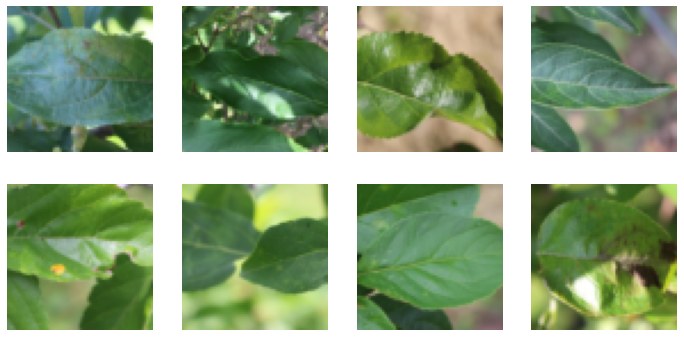

In [ ]:
# Showing our data

dls.show_batch()

In [ ]:
dls.one_batch()

(InvisibleTensor([[ 3.6356e-02, -1.9674e+00,  1.1134e+00,  1.4258e+00,  1.8819e+00,
           4.3187e-02, -1.7914e-01, -2.6354e+00,  8.1882e-01,  5.0842e-01,
          -6.5181e-01,  1.1556e+00,  2.2116e-01, -1.5552e-02, -1.3349e+00,
          -2.1546e+00,  1.0498e+00, -7.0462e-01, -1.1618e+00, -7.6000e-01,
           3.3483e-01, -9.9796e-01,  2.3452e+00,  2.6210e+00,  3.3536e-01,
           6.3683e-01, -6.8990e-02, -1.4449e+00,  1.0695e+00, -1.8986e-01,
          -1.0738e-01,  1.0968e+00, -1.5546e-01, -7.1940e-01,  1.6196e-01,
          -7.8661e-01, -2.6123e+00, -1.4853e+00, -2.5822e-01,  1.2833e+00,
          -3.3942e-01,  2.1818e+00,  1.5257e-01,  1.0969e+00, -5.8969e-01,
           4.7256e-01,  3.9179e-01, -2.5030e-01,  6.1049e-01, -5.0398e-01,
           6.6839e-01,  4.9449e-01, -1.8191e+00,  7.7499e-01,  2.2670e+00,
           1.7866e-01,  8.7606e-01, -5.7140e-01,  2.0586e-01,  2.0747e-01,
           5.3743e-01,  5.9832e-01,  2.2860e-01, -1.2707e+00,  2.2563e-01,
          -1.196

# Creating GAN

## The Generator

In [ ]:
generator = basic_generator(IMAGE_SIZE, n_channels=3, n_extra_layers=1)
generator

Sequential(
  (0): AddChannels()
  (1): ConvLayer(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (2): ConvLayer(
    (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (3): ConvLayer(
    (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (4): ConvLayer(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (5): ConvLayer(
    (0): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(1,

## The Critic

In [ ]:
critic = basic_critic(IMAGE_SIZE, n_channels=3, n_extra_layers=1, act_cls=partial(nn.LeakyReLU, negative_slope=0.2))
critic

Sequential(
  (0): ConvLayer(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2)
  )
  (1): ConvLayer(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
  )
  (2): ConvLayer(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
  )
  (3): ConvLayer(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
  )
  (4): ConvLayer(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05,

## GAN

In [ ]:
learn = GANLearner.wgan(dls, generator=generator, critic=critic, opt_func=RMSProp)
learn.model

GANModule(
  (generator): Sequential(
    (0): AddChannels()
    (1): ConvLayer(
      (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): ConvLayer(
      (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): ConvLayer(
      (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (4): ConvLayer(
      (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (5): Conv

In [ ]:
learn.recorder.train_metrics = True
learn.recorder.valid_metrics = False

# Training the Model ( 1 Epoch )

In [ ]:
wandb.init(project='FastAI GAN', name='first training', notes='Our First Training, using 1 extra layers')

wandb: Currently logged in as: shubhamai (use `wandb login --relogin` to force relogin)


In [ ]:
learn.fit(1, 2e-4, wd=0., cbs=[WandbCallback()])

WandbCallback requires use of "SaveModelCallback" to log best model
WandbCallback was not able to prepare a DataLoader for logging prediction samples -> list index out of range


epoch,train_loss,gen_loss,crit_loss,time
0,-1.031719,0.670342,-1.212507,15:57


/usr/local/lib/python3.6/dist-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


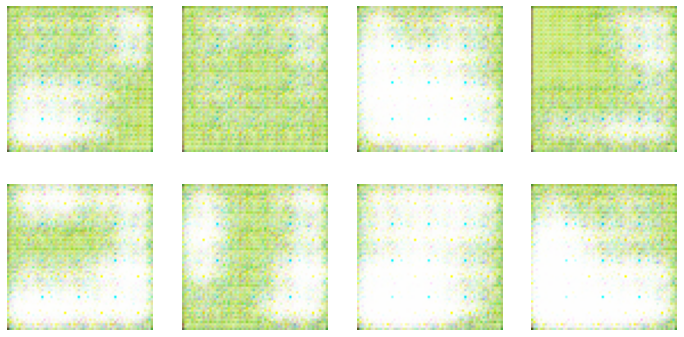

In [ ]:
# Showing Predictions

learn.show_results(ds_idx=0)

In [ ]:
# Predting Single Noise

pred_img = learn.predict(generate_noise(1))
pred_img

(TensorImage([[[ 79, 222, 215,  ..., 168, 188, 105],
          [229, 231, 182,  ..., 206, 206, 182],
          [132, 212, 249,  ..., 224, 177, 196],
          ...,
          [170, 166, 222,  ..., 208, 211, 166],
          [169, 179, 136,  ..., 202, 205, 150],
          [ 92, 119, 157,  ..., 181, 180,  67]],
 
         [[179, 227, 218,  ..., 187, 189, 180],
          [215, 243, 239,  ..., 227, 240, 201],
          [245, 231, 249,  ..., 244, 232, 186],
          ...,
          [149, 210, 234,  ..., 228, 242, 213],
          [146, 230, 217,  ..., 240, 216, 182],
          [ 99, 182, 222,  ..., 190, 230, 165]],
 
         [[123, 196, 194,  ...,  76, 103, 104],
          [139, 216, 243,  ..., 181, 176, 144],
          [203, 227, 211,  ..., 118, 163, 109],
          ...,
          [100, 136, 205,  ..., 174, 161, 114],
          [116, 174, 214,  ..., 141, 181,  96],
          [ 55, 137, 105,  ..., 142, 146,  58]]]),
 tensor([[[0.3108, 0.8724, 0.8457,  ..., 0.6590, 0.7390, 0.4138],
          [

In [ ]:
# Processing the output

out_img = np.moveaxis(pred_img[0].numpy(), 0, -1)
out_img.shape

(64, 64, 3)

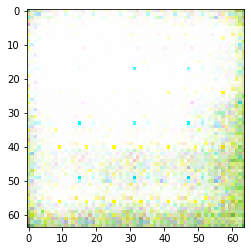

In [ ]:
# Showing the prediction

plt.imshow(out_img)

# Training the Model ( 30 Epochs )

In [ ]:
wandb.init(project='FastAI GAN', name='30 epochs', notes='Training Model for 30 Epochs, 1 extra layers')

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


epoch,1
train_loss,-1.03172
raw_loss,-1.47784
wd_0,0.0
sqr_mom_0,0.99
eps_0,0.0
lr_0,0.0002
mom_0,0.0
_step,454
_runtime,963
_timestamp,1603553702


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_loss,█▆▄▃▂▂▂▁▁▂▂▂▂▃▃▄▃▃▃▄▃▃▃▂▂▂▂▂▃▃▂▂▂▁▂▂▂▂▁▁
raw_loss,▄▇██████▁▂▃▅▄▃▂▄▁▁▂▅▁▁▄▁███▇████▁▁▂▂▁▁▁▁
wd_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sqr_mom_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mom_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


In [ ]:
learn.fit(30, 2e-4, wd=0., cbs=[WandbCallback()])

WandbCallback requires use of "SaveModelCallback" to log best model
WandbCallback was not able to prepare a DataLoader for logging prediction samples -> list index out of range


epoch,train_loss,gen_loss,crit_loss,time
0,-0.984707,0.671692,-1.254392,02:31
1,-1.125800,0.696424,-1.334581,02:32
2,-0.923945,0.715869,-1.305630,02:32
3,-1.159652,0.719634,-1.366534,02:34
4,-1.170689,0.708503,-1.445925,02:34
5,-0.878020,0.599498,-1.051295,02:33
6,-0.984191,0.687469,-1.269162,02:29
7,-1.100929,0.682513,-1.374676,02:27
8,-1.121272,0.708224,-1.289434,02:25
9,-0.829082,0.683458,-1.182897,02:25


/usr/local/lib/python3.6/dist-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


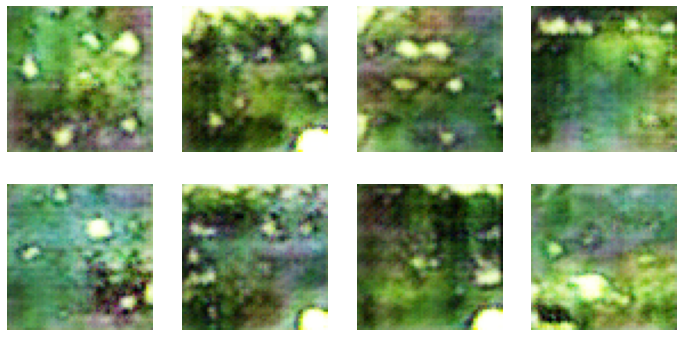

In [ ]:
learn.show_results(ds_idx=0)

# Saving & Loading Models

In [ ]:
# Saving our Model

learn.export("/content/export.pkl")

In [ ]:
# Loading Our Model

loaded_learner = load_learner("/content/export.pkl")

loaded_learner.model

GANModule(
  (generator): Sequential(
    (0): AddChannels()
    (1): ConvLayer(
      (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): ConvLayer(
      (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): ConvLayer(
      (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (4): ConvLayer(
      (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (5): Conv

In [ ]:
# Predting Single Noise

pred_img = loaded_learner.predict(generate_noise(1))
pred_img

(TensorImage([[[109, 101, 120,  ...,  67,  57,  69],
          [115,  97,  69,  ...,  54,  42,  74],
          [109,  70,  52,  ...,  50,  60,  62],
          ...,
          [111, 104,  83,  ..., 105,  86,  89],
          [133,  81, 104,  ...,  93,  85,  86],
          [130, 137, 125,  ..., 103,  95,  86]],
 
         [[154, 172, 158,  ...,  99, 105, 103],
          [161, 170, 120,  ...,  87,  81, 103],
          [154, 148, 124,  ...,  86, 106,  95],
          ...,
          [169, 154, 116,  ..., 151, 148, 140],
          [177, 162, 152,  ..., 144, 139, 130],
          [167, 167, 165,  ..., 142, 139,  93]],
 
         [[ 68, 131, 127,  ...,  46,  40,  55],
          [ 93,  87,  93,  ...,  19,  30,  52],
          [ 89,  75,  82,  ...,  23,  45,  44],
          ...,
          [101, 118, 100,  ...,  59,  55,  61],
          [117, 134, 111,  ...,  54,  64,  68],
          [ 77, 125, 125,  ...,  79,  73,  72]]]),
 tensor([[[0.4312, 0.3966, 0.4742,  ..., 0.2655, 0.2249, 0.2735],
          [

In [ ]:
# Processing the output

out_img = np.moveaxis(pred_img[0].numpy(), 0, -1)
out_img.shape

(64, 64, 3)

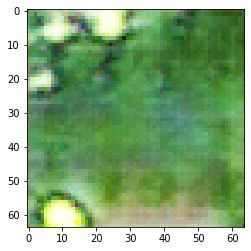

In [ ]:
# Showing the prediction

plt.imshow(out_img)

# Training Model with 3 Extra Layers

In [ ]:
learn.fit(30, 2e-4, wd=0)

epoch,train_loss,gen_loss,crit_loss,time
0,-1.099259,0.681728,-1.337379,19:10
1,-1.186200,0.757891,-1.532716,02:35
2,-1.160432,0.743548,-1.485742,02:32
3,-0.976379,0.653022,-1.278008,02:28
4,-1.134311,0.740647,-1.503513,02:28
5,-1.085454,0.724703,-1.432061,02:26
6,-1.094773,0.624525,-1.227550,02:25
7,-1.010338,0.700265,-1.356911,02:24
8,-0.587127,0.684654,-1.227850,02:25
9,-0.961136,0.588592,-1.285134,02:27


/usr/local/lib/python3.6/dist-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
